# Demonstration 3: Logistic Regression with Gradient Descent in Python


**1. Import Modules**  
Once again, let's import a few modules

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib           import cm
from mpl_toolkits.mplot3d import axes3d, Axes3D

**2.  Define helper functions**  
we need   
* binary data
* functions to plot results


In [193]:
def generateData(numSamples=1000,mean1=[0,0],cov1=[[1,.7],[.7,1]],mean2=[-1,5],cov2=[[1,.7],[.7,1]]):
    # generate some data (two multivariate gaussians)
    x1, y1 = np.random.multivariate_normal(mean1, cov1, int(numSamples/2)).T
    x2, y2 = np.random.multivariate_normal(mean2, cov2, int(numSamples/2)).T
  
    x = np.concatenate((x1,x2))
    y = np.concatenate((y1,y2))
  
    xData = np.array([x,y]).T
    yData = np.concatenate((np.zeros(numSamples//2),np.ones(numSamples//2)))  
  
    shuffIdces = np.random.permutation(numSamples) 
    xData   = xData[shuffIdces,:]
    yData   = yData[shuffIdces]
    yData   = yData[:,np.newaxis]
    return xData,yData

def plotScatterData(x,y,legendStr=['class A','class B'],titleStr='data'):
    plt.figure()
    plt.plot(x[y[:,0]==0,0],x[y[:,0]==0,1],'o',color='blue')
    plt.plot(x[y[:,0]==1,0],x[y[:,0]==1,1],'o',color='red')
    plt.title(titleStr)
    plt.legend(legendStr)
    
def plotLossSurface(x,y,z,xLabel='theta1',yLabel='theta2',zLabel='Loss',titleStr='loss surface'):
    # 1. surface plot
    fig = plt.figure()
    ax = Axes3D(fig)
    ax.plot_surface(x,y,z,cmap=cm.coolwarm)    
    ax.set_xlabel(xLabel)
    ax.set_ylabel(yLabel)
    ax.set_zlabel(zLabel)
    ax.set_title(titleStr)
    
def plotLossTrajectory(x,y,z,th,lo,xLabel='theta1',yLabel='theta2',zLabel='Loss',titleStr='loss trajectory'):
    fig = plt.figure()
    ax = Axes3D(fig)
    ax.plot_surface(x,y,z,cmap=cm.coolwarm)
    ax.plot3D(th[:,1],th[:,2],lo,'-o',color='red')
    ax.set_xlabel(xLabel)
    ax.set_ylabel(yLabel)
    ax.set_zlabel(zLabel)
    ax.set_title(titleStr)

def plotLossCurve(x,y,titleStr='training loss'):
    fig = plt.figure()
    ax = fig.gca()
    ax.plot(x,y,'-',color='blue')
    ax.set_xlabel('iterations')
    ax.set_ylabel('loss')
    ax.set_title(titleStr)

**3. Generate and visualise some toy data**  
Let's first generate some toy data and display it as scatter plot!

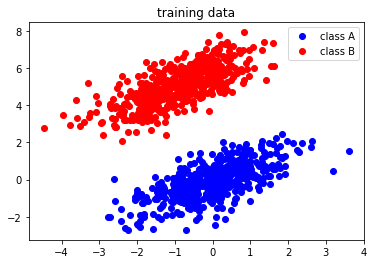

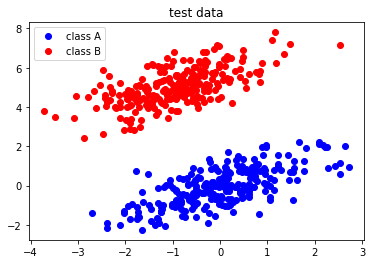

In [185]:
# define parameters
nTrainingSamples = 1000
nTestSamples     =  500

# generate data
xTrain,yTrain = generateData(numSamples=nTrainingSamples)
xTest,yTest   =     generateData(numSamples=nTestSamples)

# display data
plotScatterData(xTrain,yTrain,titleStr='training data')
plotScatterData(xTest,yTest,titleStr='test data')

# add constant terms 
xTrain = np.concatenate((np.ones((nTrainingSamples,1)),xTrain),axis=1)
xTest = np.concatenate((np.ones((nTestSamples,1)),xTest),axis=1)


** 4. Build the model **  
We'll take a modular approach, similar to how we'll later build a neural network


In [158]:
def linearFunction(x,thetas):
    # defines a simple linear function 
    return np.dot(x,thetas.T)

def logisticFunction(x):
    # defines a logistic function
    return 1.0/(1.0+np.exp(-x))

def lossFunction(y_true,y_hat):
    # cross entropy loss
    y_true = y_true.reshape((-1,1))
    loss = -np.mean(y_true*np.log(y_hat+1e-10)+(1-y_true)*np.log(1-y_hat+1e-10))
    return loss

def lossGradient(x,y_true,y_hat):      
    # compute the gradient of the loss function wrt to the weights  
    gradients = np.mean((np.dot(x.T,(y_hat-y_true))),axis=1)          
    return gradients

def regressionModel(x,thetas):
    z = linearFunction(x,thetas)
    y = logisticFunction(z)
    return y

**5. Explore the error surface**   
Once again, we explore the error surface for various values of theta

In [163]:
theta1 = np.linspace(-10,10,50)
theta2 = np.linspace(-10,10,50)
[i,s]      = np.meshgrid(theta1,theta2)
loss       = np.empty((50,50))
for ii,t1 in enumerate(theta1):
    for jj,t2 in enumerate(theta2):
        loss[ii,jj] = lossFunction(yTrain,regressionModel(xTrain,np.array([[0,t1,t2]])))
    
    
  

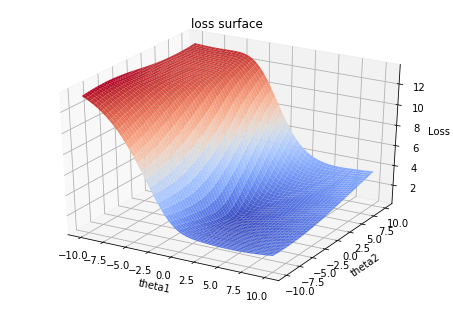

In [187]:
plotLossSurface(i,s,loss)

**6. Implement the training algorithm **  
this implements gradient descent

In [134]:
def runGD(x,y_true,thetas,epsilon,numIters):
    # performs gradient descent on data  
    losses    = np.empty((numIters))
    thetaHats = np.empty((numIters,3))
    for ii in range(numIters):
        # get predictions with current parameter value
        y_hat = regressionModel(x,thetas)
        # store intermediate results:
        losses[ii] = lossFunction(y_true,y_hat)
        thetaHats[ii,:] = thetas
        # compute gradients (on whole dataset)
        gradients = lossGradient(x,y_true,y_hat)
        
        # update parameters  
        thetas = thetas-epsilon*gradients   
    
    return losses,thetaHats

** 7. Train the model**  
Now we train the model

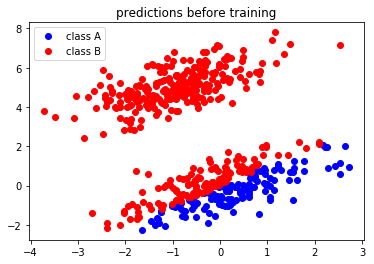

In [196]:
# parameters
epsilon = 1e-3
numIters = 1000
# initial guesses for the thetas 
# note: we usually use random initialisation, this here
# is for illustration purposes
thetas = np.array([[0,-10,10]])


# show results for initialised function
yTest_pred = regressionModel(xTest,thetas) > 0.5

plotScatterData(xTest[:,1:],yTest_pred,titleStr='predictions before training')


# train the model
lossVect = np.empty(numIters)
lossVect,thetaVect = runGD(xTrain,yTrain,thetas,epsilon,numIters)


** 8. Evaluate the model**   
Let's have a look at the results

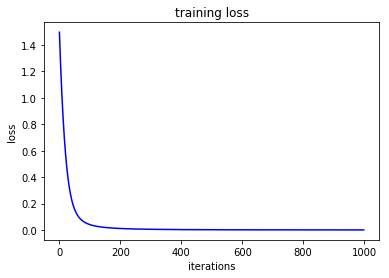

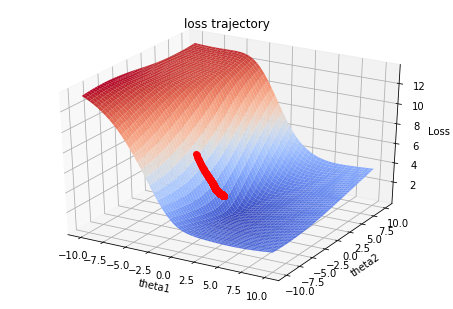

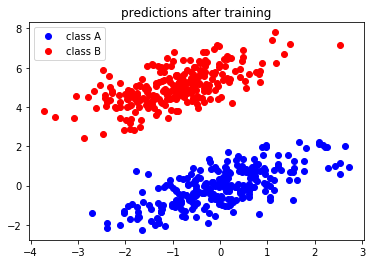

In [197]:

# plot loss function
plotLossCurve(np.arange(numIters),lossVect)

# plot gradient trajectory 
plotLossTrajectory(i,s,loss,thetaVect,lossVect)

# show fitted function
yTest_pred = regressionModel(xTest,thetaVect[-1,:]) > 0.5
yTest_pred = yTest_pred[:,np.newaxis]
plotScatterData(xTest[:,1:],yTest_pred,titleStr='predictions after training')
